In [1]:
import os
import csv
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler

dtypes = {
        'IsCanceled':                                    'float64',
        'LeadTime':                                          'float64',
        'StaysInWeekendNights':                                     'float64',
        'StaysInWeekNights':                                     'float64',
        'Adults':                            'float64',
        'Children':                            'float64',
        'Babies':                                  'float64',
        'Meal':                                    'category',
        'Country':                                               'category',
        'MarketSegment':                                    'category',
        'DistributionChannel':                                       'category',
        'IsRepeatedGuest':                               'float64',
        'PreviousCancellations':                                    'float64',
        'PreviousBookingsNotCanceled':                          'float64',
        'ReservedRoomType':                                             'category',
        'AssignedRoomType':                                            'category',
        'BookingChanges':                                                'float64',
        'DepositType':                                              'category',
        'Agent':                                              'category',
        'Company':                                 'category',
        'DaysInWaitingList':                                           'float64',
        'CustomerType':                                           'category',
        'ADR':                                          'float64',
        'RequiredCarParkingSpaces':                                      'float64',
        'TotalOfSpecialRequests':                                              'float64',
        'ReservationStatus':                                                'category'
        }

In [2]:
train_df = pd.read_csv('H1full.csv', dtype=dtypes, converters={'ArrivalDateWeekNumber': '{:0>2}'.format})
a=train_df.head()
b=train_df
b
c=b.sort_values(['ArrivalDateYear','ArrivalDateWeekNumber'], ascending=True)
c=pd.DataFrame(c)
c
type(c)

pandas.core.frame.DataFrame

In [3]:
from pandas import DataFrame  

df = DataFrame(c, columns= ['ArrivalDateYear', 'ArrivalDateWeekNumber']) 
df

,ArrivalDateYear,ArrivalDateWeekNumber
0,2015,27
1,2015,27
2,2015,27
3,2015,27
4,2015,27
5,2015,27
6,2015,27
7,2015,27
8,2015,27
9,2015,27


In [4]:
# https://datatofish.com/concatenate-values-python/

df1 = df['ArrivalDateYear'].map(str) + df['ArrivalDateWeekNumber'].map(str)
print (df1)
df1=pd.DataFrame(df1)

0        201527
1        201527
2        201527
3        201527
4        201527
5        201527
6        201527
7        201527
8        201527
9        201527
10       201527
11       201527
12       201527
13       201527
14       201527
15       201527
16       201527
17       201527
18       201527
19       201527
20       201527
21       201527
22       201527
23       201527
24       201527
25       201527
26       201527
27       201527
28       201527
29       201527
          ...  
40021    201735
40022    201735
40024    201735
40025    201735
40026    201735
40027    201735
40028    201735
40029    201735
40030    201735
40031    201735
40032    201735
40034    201735
40035    201735
40036    201735
40038    201735
40039    201735
40040    201735
40041    201735
40042    201735
40043    201735
40047    201735
40048    201735
40049    201735
40050    201735
40054    201735
40055    201735
40056    201735
40057    201735
40058    201735
40059    201735
Length: 40060, dtype: ob

In [5]:
df2 = DataFrame(c, columns= ['IsCanceled']) 
df2

,IsCanceled
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,1.0
9,1.0


In [6]:
type(df1)

pandas.core.frame.DataFrame

In [7]:
df3=pd.concat([df1, df2], axis = 1)
df3
df3.columns = ['FullDate', 'IsCanceled']

In [8]:
df3
df3.sort_values(['FullDate','IsCanceled'], ascending=True)

,FullDate,IsCanceled
0,201527,0.0
1,201527,0.0
2,201527,0.0
3,201527,0.0
4,201527,0.0
5,201527,0.0
6,201527,0.0
7,201527,0.0
11,201527,0.0
12,201527,0.0


In [9]:
df4 = df3.groupby('FullDate').agg(sum)
df4
df4.sort_values(['FullDate'], ascending=True)

,IsCanceled
FullDate,
201527,41.0
201528,48.0
201529,87.0
201530,74.0
201531,101.0
201532,68.0
201533,96.0
201534,69.0
201535,88.0


In [10]:
tseries=df4['IsCanceled']
tseries

FullDate
201527     41.0
201528     48.0
201529     87.0
201530     74.0
201531    101.0
201532     68.0
201533     96.0
201534     69.0
201535     88.0
201536    148.0
201537     76.0
201538    186.0
201539    123.0
201540     91.0
201541    198.0
201542     16.0
201543     94.0
201544     44.0
201545     45.0
201546     54.0
201547     63.0
201548     18.0
201549    127.0
201550     24.0
201551     37.0
201552     79.0
201553     43.0
201601     35.0
201602     40.0
201603     14.0
          ...  
201706     91.0
201707     96.0
201708    128.0
201709     77.0
201710    126.0
201711     83.0
201712     49.0
201713    105.0
201714    109.0
201715    179.0
201716    104.0
201717    106.0
201718    167.0
201719    106.0
201720     79.0
201721    130.0
201722    202.0
201723    117.0
201724    152.0
201725    131.0
201726    161.0
201727    131.0
201728    139.0
201729    150.0
201730    157.0
201731    173.0
201732    140.0
201733    182.0
201734    143.0
201735    100.0
Name: IsCancele

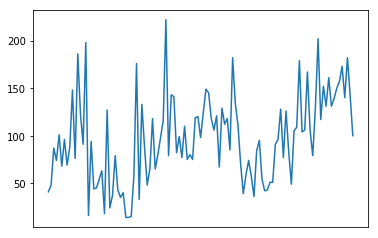

In [11]:
import matplotlib.pyplot as plt
plt.plot(tseries)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

In [12]:
df=pd.DataFrame(tseries)
df

,IsCanceled
FullDate,
201527,41.0
201528,48.0
201529,87.0
201530,74.0
201531,101.0
201532,68.0
201533,96.0
201534,69.0
201535,88.0


In [13]:
tseriesr=pd.Series(tseries)
type(tseriesr)

# logvalue=np.log(tseriesr)
train, val = tseriesr[1:80], tseriesr[81:100]

In [14]:
type(val)

pandas.core.series.Series

In [15]:
train

FullDate
201528     48.0
201529     87.0
201530     74.0
201531    101.0
201532     68.0
201533     96.0
201534     69.0
201535     88.0
201536    148.0
201537     76.0
201538    186.0
201539    123.0
201540     91.0
201541    198.0
201542     16.0
201543     94.0
201544     44.0
201545     45.0
201546     54.0
201547     63.0
201548     18.0
201549    127.0
201550     24.0
201551     37.0
201552     79.0
201553     43.0
201601     35.0
201602     40.0
201603     14.0
201604     14.0
          ...  
201624     77.0
201625    110.0
201626     75.0
201627     80.0
201628     75.0
201629    119.0
201630    120.0
201631     98.0
201632    124.0
201633    149.0
201634    145.0
201635    118.0
201636    106.0
201637    121.0
201638     67.0
201639    129.0
201640    112.0
201641    118.0
201642     85.0
201643    182.0
201644    134.0
201645    111.0
201646     70.0
201647     39.0
201648     59.0
201649     74.0
201650     57.0
201651     36.0
201652     84.0
201653     95.0
Name: IsCancele

In [16]:
val

FullDate
201702     42.0
201703     43.0
201704     51.0
201705     51.0
201706     91.0
201707     96.0
201708    128.0
201709     77.0
201710    126.0
201711     83.0
201712     49.0
201713    105.0
201714    109.0
201715    179.0
201716    104.0
201717    106.0
201718    167.0
201719    106.0
201720     79.0
Name: IsCanceled, dtype: float64

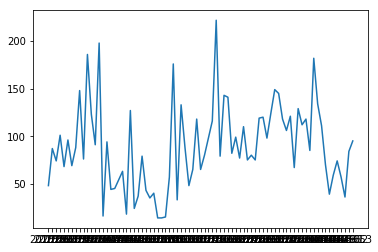

In [17]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.stattools as ts

plt.plot(train)
plt.show()

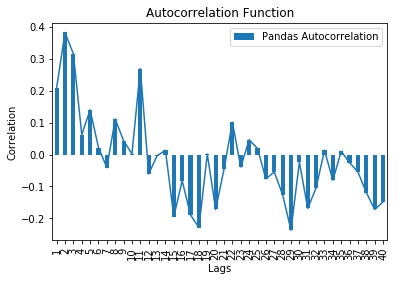

In [18]:
#Autocorrelation Plot
acf_1 =  acf(train)[1:50]
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Pandas Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
plt.plot(acf_1)
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.title(r'Autocorrelation Function')
plt.show()

In [19]:
acf_1

array([ 0.20931733,  0.38197312,  0.31530534,  0.0622506 ,  0.1396059 ,
        0.02172799, -0.04126991,  0.11103553,  0.04299311,  0.00205462,
        0.26860433, -0.06040052, -0.00380789,  0.0130726 , -0.19428628,
       -0.08193784, -0.18951941, -0.22849462,  0.00183862, -0.17196409,
       -0.04549428,  0.10074914, -0.03905616,  0.04614769,  0.0188279 ,
       -0.07631446, -0.05476133, -0.1257952 , -0.23682021, -0.0239377 ,
       -0.16840741, -0.10447924,  0.01352176, -0.08054517,  0.01015105,
       -0.02548999, -0.05462688, -0.11893659, -0.17193458, -0.14839724])

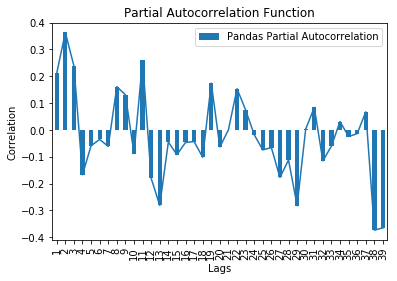

In [20]:
#Partial Autocorrelation Plot
pacf_1 =  pacf(train)[1:40]
val_df = pd.DataFrame([pacf_1]).T
val_df.columns = ['Pandas Partial Autocorrelation']
val_df.index += 1
val_df.plot(kind='bar')
plt.plot(pacf_1)
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.title(r'Partial Autocorrelation Function')
plt.show()

In [21]:
pacf_1

array([ 0.21200088,  0.3632774 ,  0.23863976, -0.1670388 , -0.05874284,
       -0.03546263, -0.06135962,  0.1612243 ,  0.1311    , -0.08807084,
        0.25891308, -0.18031084, -0.2814698 , -0.04519587, -0.09229597,
       -0.04686845, -0.04336517, -0.10180477,  0.17450237, -0.06355372,
        0.00043641,  0.15359563,  0.07481384, -0.01768203, -0.07443292,
       -0.06589568, -0.17733184, -0.11195016, -0.28249504,  0.00292817,
        0.08378081, -0.11551819, -0.06006309,  0.03118785, -0.02486253,
       -0.0138124 ,  0.06748982, -0.37381605, -0.3650742 ])

In [22]:
#Dickey-Fuller Test
result = ts.adfuller(train)
result
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.677149
p-value: 0.078077
Critical Values:
	1%: -3.519
	5%: -2.900
	10%: -2.587


In [23]:
# https://www.kdnuggets.com/2018/02/google-colab-free-gpu-tutorial-tensorflow-keras-pytorch.html/2
# https://pypi.org/project/pyramid-arima/
!pip install -q pyramid-arima==0.9.0

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [24]:
from pyramid.arima import auto_arima
Arima_model=auto_arima(train, start_p=0, start_q=0, max_p=10, max_q=10, start_P=0, start_Q=0, max_P=10, max_Q=10, m=52, seasonal=True, trace=True, d=1, D=1, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    
  """, UserWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pyramid

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=305.146, BIC=307.662, Fit time=0.139 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=292.219, BIC=295.993, Fit time=0.590 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 52); AIC=293.486, BIC=298.518, Fit time=0.587 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 0, 52); AIC=294.780, BIC=301.070, Fit time=1.319 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(0, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(1, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=293.144, BIC=298.176, Fit time=0.896 seconds
Total fit time: 3.549 seconds


In [25]:
Arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   79
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 52)   Log Likelihood                -143.109
Date:                            Fri, 25 Oct 2019   AIC                            292.219
Time:                                    16:05:12   BIC                            295.993
Sample:                                         0   HQIC                           293.306
                                             - 79                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.4681     12.198      0.202      0.840     -21.440      26.377
ar.L1         -0.6512      0.170     -3.829      0.000      -0.985      -0.318
sigma2      3462.5541   1487.712      2.327      0.020     546.692    6378.416
===================================================================================
Ljung-Box (Q):                       19.82   Jarque-Bera (JB):                 1.28
Prob(Q):                              0.76   Prob(JB):                         0.53
Heteroskedasticity (H):               2.36   Skew:                            -0.02
Prob(H) (two-sided):                  0.22   Kurtosis:                         1.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
prediction=pd.DataFrame(Arima_model.predict(n_periods=19), index=val.index)
prediction.columns = ['Predicted_Cancellations']
predictions=prediction['Predicted_Cancellations']

In [27]:
prediction

,Predicted_Cancellations
FullDate,
201702,90.096059
201703,73.013261
201704,69.674854
201705,75.316831
201706,116.762287
201707,238.591519
201708,96.217365
201709,198.277972
201710,154.404317


In [28]:
val

FullDate
201702     42.0
201703     43.0
201704     51.0
201705     51.0
201706     91.0
201707     96.0
201708    128.0
201709     77.0
201710    126.0
201711     83.0
201712     49.0
201713    105.0
201714    109.0
201715    179.0
201716    104.0
201717    106.0
201718    167.0
201719    106.0
201720     79.0
Name: IsCanceled, dtype: float64

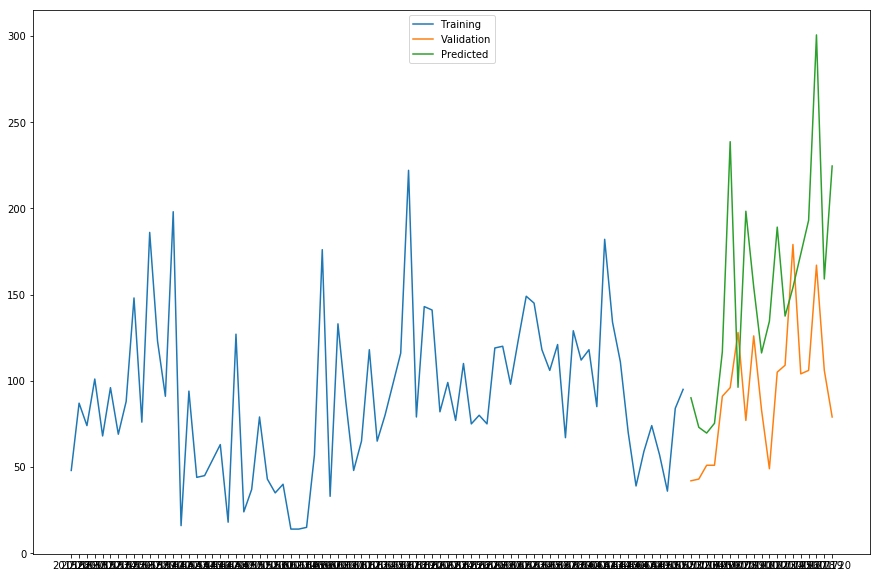

In [29]:
plt.figure(figsize=(15,10))
plt.plot(train, label='Training')
plt.plot(val, label='Validation')
plt.plot(prediction, label='Predicted')
plt.legend(loc = 'upper center')
plt.show()

In [30]:
import numpy as np

def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [31]:
type(predictions)

pandas.core.series.Series

In [32]:
mda(val, predictions)

0.8947368421052632

In [33]:
import math
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(val, predictions)
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 77.047252


In [34]:
test = np.array([[130,202,117,152,131,161,131,139,150,157,173,140,182,143,100]])
test.shape

(1, 15)

In [35]:
test=test.reshape(-1)
test

array([130, 202, 117, 152, 131, 161, 131, 139, 150, 157, 173, 140, 182,
       143, 100])

In [36]:
test.shape

(15,)

In [37]:
test = pd.Series(test)

In [38]:
predictionnew=pd.DataFrame(Arima_model.predict(n_periods=15), index=test.index)
predictionnew.columns = ['Unseen_Predicted_Cancellations']
predictionsnew=predictionnew['Unseen_Predicted_Cancellations']

In [39]:
mse_new = mean_squared_error(test, predictionsnew)
rmse_new = math.sqrt(mse_new)
print('RMSE: %f' % rmse_new)

RMSE: 57.955865


In [40]:
mda(test, predictionsnew)

0.8666666666666667

In [41]:
forecast_error_new = (predictionsnew-test)
forecast_error_new

0     -39.903941
1    -128.986739
2     -47.325146
3     -76.683169
4     -14.237713
5      77.591519
6     -34.782635
7      59.277972
8       4.404317
9     -40.860982
10    -38.522419
11     49.074094
12    -44.497360
13     11.040560
14     73.507259
dtype: float64

In [42]:
mean_forecast_error_new = np.mean(forecast_error_new)
mean_forecast_error_new

-12.726958780163237

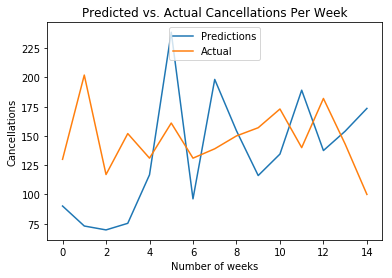

In [43]:
predictons, =plt.plot(predictionsnew, label='Predictions')
actual, =plt.plot(test, label='Actual')
plt.xlabel('Number of weeks')
plt.ylabel('Cancellations')
plt.title("Predicted vs. Actual Cancellations Per Week")
plt.legend(loc = 'upper center')
plt.show()